In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau_balance.csv")
df.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


# TABLE DESCRIPTION

In [15]:
description = pd.read_csv('D:\data prep\project data\dseb63_columns_description.csv',encoding='latin',index_col=0)
description = description[description['Table'].str.contains('bureau_balance')].drop(columns = 'Table',axis = 0).set_index("Row")
description

,Description,Special
Row,,
SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
STATUS,Status of Credit Bureau loan during the month ...,NaN


# CHECK NULL

In [16]:
number_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'number_missing' : number_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,number_missing,percent_missing
SK_ID_BUREAU,SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,MONTHS_BALANCE,0,0.0
STATUS,STATUS,0,0.0


In [17]:
columns = df.loc[:,(df.isnull().sum(axis = 0) / df.shape[0]) >= 0.9].columns
columns

Index([], dtype='object')

I didn't find any column with >90%null. So removing is not necessary

# CHECK OUTLIERS

<Axes: ylabel='SK_ID_BUREAU'>

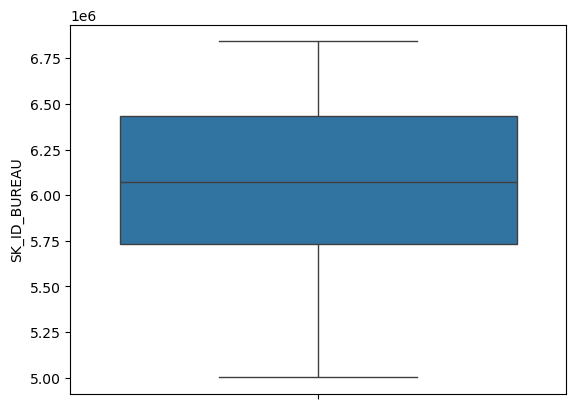

In [18]:
sns.boxplot(df['SK_ID_BUREAU'])

<Axes: ylabel='MONTHS_BALANCE'>

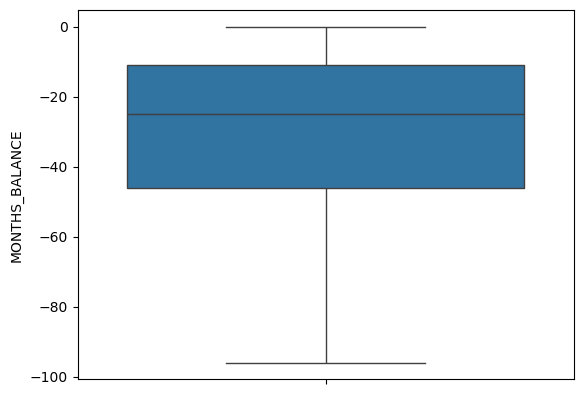

In [19]:
sns.boxplot(df['MONTHS_BALANCE'])

<Axes: ylabel='STATUS'>

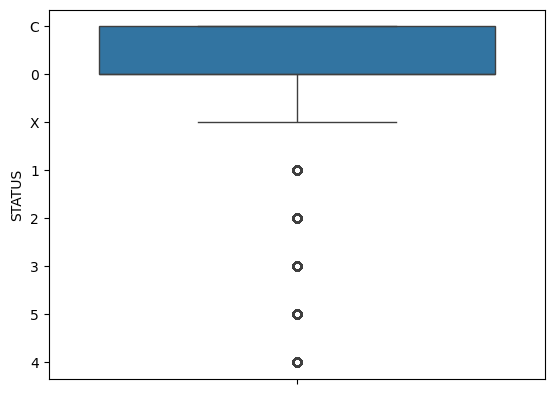

In [20]:
sns.boxplot(df['STATUS'])

# CHECK VALID

In [21]:
numerical_data = df._get_numeric_data()

In [22]:
for column in numerical_data.columns:
    value_counts = numerical_data[column].apply(lambda x: '>0' if x > 0 else ('=0' if x == 0 else '<0')).value_counts()
    
    for cat in ['>0', '=0', '<0']:
        if cat not in value_counts:
            value_counts[cat] = 0
    
    nan_total = numerical_data[column].isnull().sum()
    other_value = numerical_data.shape[0] - value_counts.sum() - nan_total

    print(f'{column} has  >0: {value_counts[">0"]}, =0: {value_counts["=0"]}, <0: {value_counts["<0"]}, nan: {nan_total}, other values: {other_value}')

SK_ID_BUREAU has  >0: 27299925, =0: 0, <0: 0, nan: 0, other values: 0
MONTHS_BALANCE has  >0: 0, =0: 610965, <0: 26688960, nan: 0, other values: 0


In [23]:
categorical_data = df.drop(columns=numerical_data.columns)

In [24]:
for column in categorical_data.columns:
    unique_values = categorical_data[column].unique()
    print(f'col {column} : {list(unique_values)}\n')

col STATUS : ['C', '0', 'X', '1', '2', '3', '5', '4']



# CHECK DISTRIBUTION OF CATEGORICAL

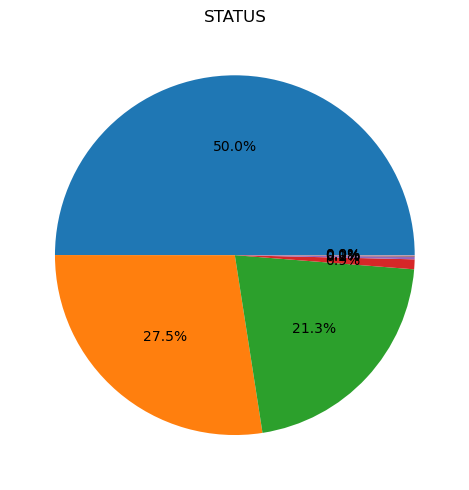

In [25]:
column_name = categorical_data.columns[0]

sizes = categorical_data[column_name].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(sizes, autopct='%1.1f%%')
ax.set_title(column_name, color='black')

plt.tight_layout()
plt.show()

In [26]:
print(f"\nInsights for {column_name}:")
    
for category, percentage in sizes.iteritems():
    print(f"{category}: {percentage * 100:.2f}%")
    
print(f"Total Unique Categories: {len(sizes)}")


Insights for STATUS:
C: 49.99%
0: 27.47%
X: 21.28%
1: 0.89%
5: 0.23%
2: 0.09%
3: 0.03%
4: 0.02%
Total Unique Categories: 8


C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\3896291981.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():


# CREATE CORRELATION MATRIX

In [27]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,SK_ID_BUREAU,MONTHS_BALANCE
SK_ID_BUREAU,1.000000,0.011873
MONTHS_BALANCE,0.011873,1.000000


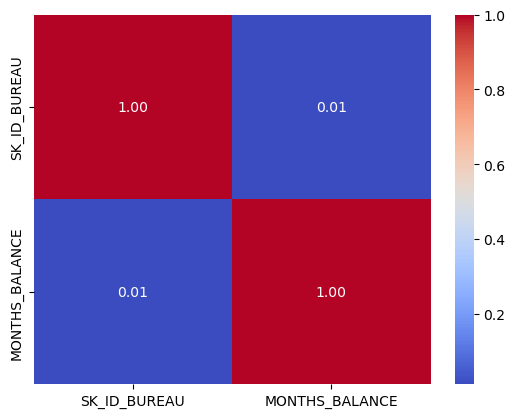

In [28]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [29]:
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
min_corr = correlation_matrix.unstack().sort_values().drop_duplicates()
print("Các cặp features có correlation cao nhất:\n", max_corr.head())

Các cặp features có correlation cao nhất:
 SK_ID_BUREAU  SK_ID_BUREAU      1.000000
              MONTHS_BALANCE    0.011873
dtype: float64


# MERGE WITH TARGET TABLE

In [30]:
df2 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
df2.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [31]:
df3 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")
df3.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [32]:
merge_table_prev = pd.merge(df2[['SK_ID_CURR','SK_ID_BUREAU']], df, how= 'left', on=['SK_ID_BUREAU'])
merge_table_prev.head()

,SK_ID_CURR,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,254629,5714462,NaN,NaN
1,254629,5714463,NaN,NaN
2,254629,5714464,NaN,NaN
3,254629,5714465,NaN,NaN
4,254629,5714466,NaN,NaN


In [37]:
merge_table = pd.merge(df3[["SK_ID_CURR", "TARGET"]], merge_table_prev, how='left', on=['SK_ID_CURR'])
merge_table.head()

,SK_ID_CURR,TARGET,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,278621,0,5885877.0,NaN,NaN
1,278621,0,5885878.0,NaN,NaN
2,278621,0,5885879.0,NaN,NaN
3,278621,0,5885880.0,NaN,NaN
4,139008,0,NaN,NaN,NaN


# CHECK DISTRIBUTION OF NUMERICAL

In [34]:
numerical_data.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')

#### SK_ID_BUREAU AND MONTHS_BALANCE

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\2841612683.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_table.loc[merge_table['TARGET'] == 0, 'MONTHS_BALANCE'], label='Class 0', kde=False, bins=30)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\2841612683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

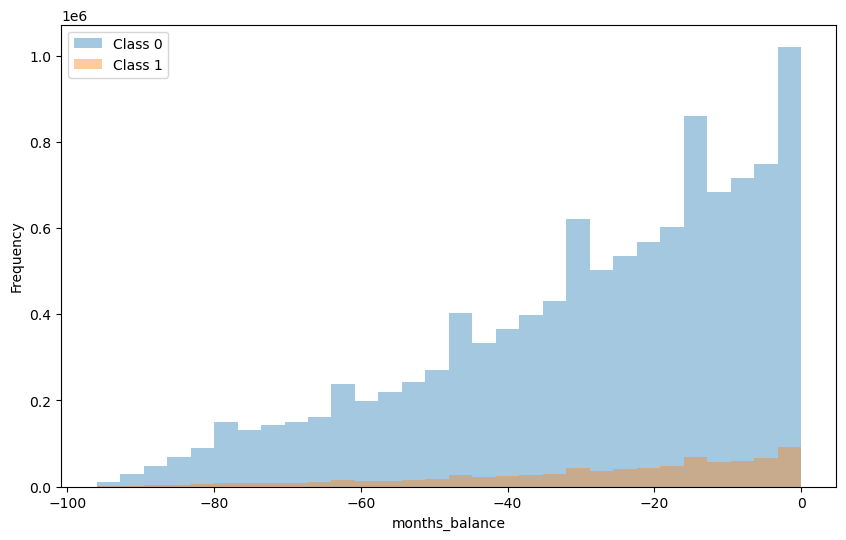

In [59]:
plt.figure(figsize=(10, 6))
sns.distplot(merge_table.loc[merge_table['TARGET'] == 0, 'MONTHS_BALANCE'], label='Class 0', kde=False, bins=30)
sns.distplot(merge_table.loc[merge_table['TARGET'] == 1, 'MONTHS_BALANCE'], label='Class 1', kde=False, bins=30)

plt.xlabel('months_balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

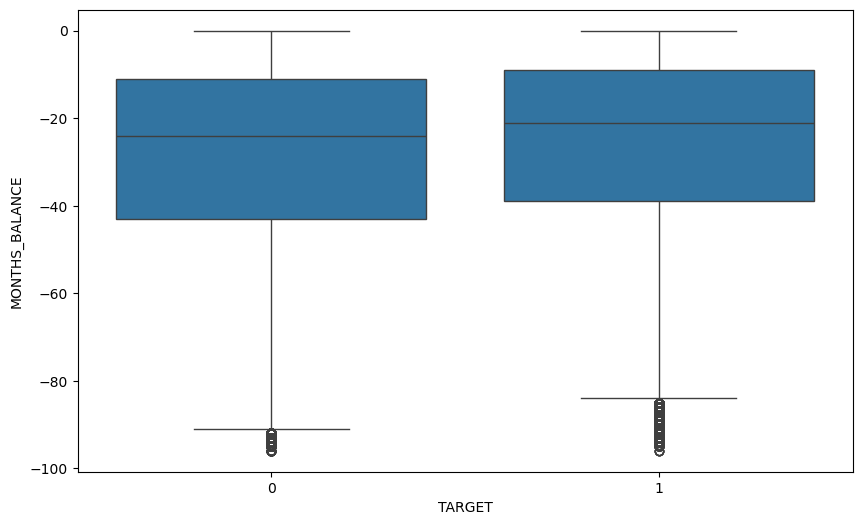

In [57]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='MONTHS_BALANCE', data=merge_table)
plt.show()

#### STATUS

In [45]:
grp = merge_table[['SK_ID_CURR', 'STATUS', 'TARGET']].groupby(['SK_ID_CURR','TARGET'])['STATUS'].nunique().reset_index()
grp.head()

,SK_ID_CURR,TARGET,STATUS
0,0,0,0
1,1,1,2
2,2,0,0
3,3,0,0
4,4,0,0


In [46]:
grp = grp[grp['STATUS'] != 0]
grp.head()

,SK_ID_CURR,TARGET,STATUS
1,1,1,2
7,8,1,7
10,11,0,4
16,20,0,3
17,21,0,4


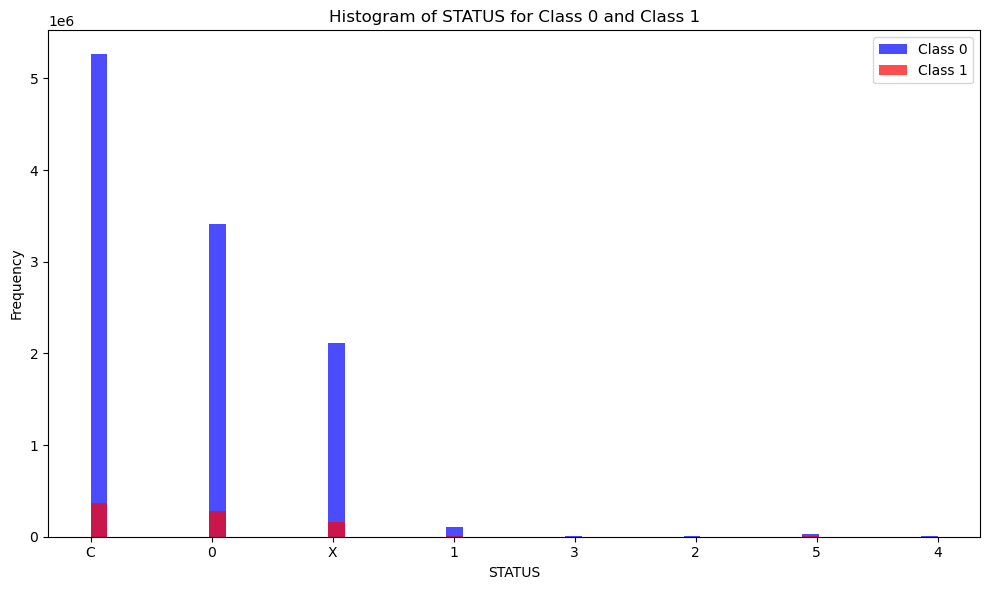

In [48]:
features = ['STATUS']

for feature in features:
    class0 = merge_table.loc[(merge_table['TARGET'] == 0) & (~merge_table[feature].isna()), feature]
    class1 = merge_table.loc[(merge_table['TARGET'] == 1) & (~merge_table[feature].isna()), feature]

    plt.figure(figsize=(10, 6))

    plt.hist(class0, bins=50, alpha=0.7, color='blue', label='Class 0')
    plt.hist(class1, bins=50, alpha=0.7, color='red', label='Class 1')

    plt.title(f'Histogram of {feature} for Class 0 and Class 1')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

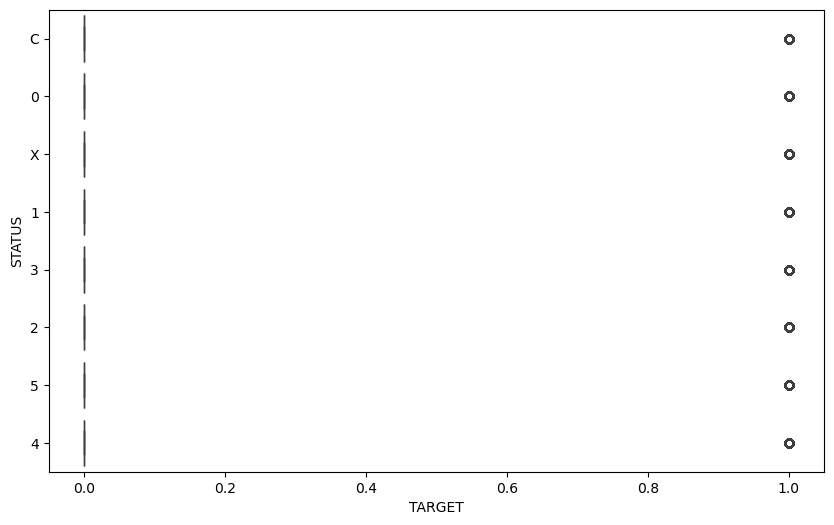

In [56]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='STATUS', data=merge_table)
plt.show()

### Có thể nói yếu tố số lượng các status không ảnh hưởng đến việc khách hàng có gặp khó khăn trong việc trả nợ hay không vì phân bố rất giống nhau 
